In [1]:
# This required pip install opencv-contrib-python
# https://mecaruco2.readthedocs.io/en/latest/notebooks_rst/Aruco/aruco_basics.html#marker-creation

In [2]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg


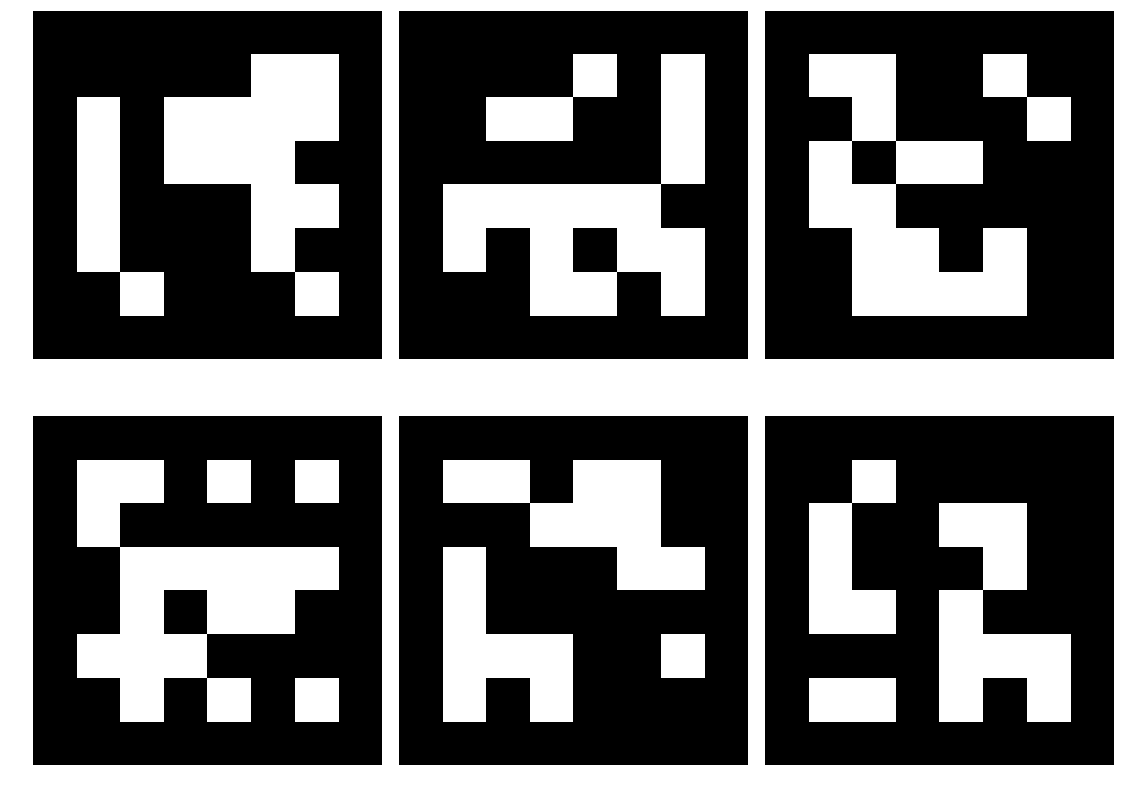

In [14]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure(figsize=(15,11))
nx = 3
ny = 2
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny, nx, i)
    img = aruco.drawMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")
plt.subplots_adjust(0,0,1,1,0.05,0.05)

plt.savefig("arucomarkers.png")
plt.show()


In [18]:
import cv2, numpy

video_file = "/home/julian/Videos/arucotags.MP4"

pattern_size = (8, 6)
square_size = float(1.0)
pattern_points = numpy.zeros((numpy.prod(pattern_size), 3), numpy.float32)
pattern_points[:,:2] = numpy.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = 0, 0

cap = cv2.VideoCapture(video_file)
interleave = cap.get(cv2.CAP_PROP_FRAME_COUNT) // 10



In [19]:
pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
nextframe = 0
frames = [ ]
while cap.get(cv2.CAP_PROP_POS_FRAMES) < cap.get(cv2.CAP_PROP_FRAME_COUNT):
    flag, frame = cap.read()
    # The frame is ready and already captured
    pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    if pos_frame >= nextframe:
        cv2.waitKey(10)  # necessary for the cv2.imshow() to work
        print("frame: ", pos_frame)
        h, w = img.shape[:2]
        nextframe += interleave
        frames.append(frame)
len(frames)

frame:  1.0
frame:  64.0
frame:  128.0
frame:  192.0
frame:  256.0
frame:  320.0
frame:  384.0
frame:  448.0
frame:  512.0
frame:  576.0
frame:  640.0


11

In [20]:
mtx, dist = (numpy.array([[505.60889582,   0.        , 606.56640502],
        [  0.        , 503.67255399, 362.81063569],
        [  0.        ,   0.        ,   1.        ]]),
 numpy.array([[-0.23212079,  0.06113066, -0.00184422,  0.00058345, -0.00765453]]))

[[4]]
[[5]
 [1]]
[[4]]


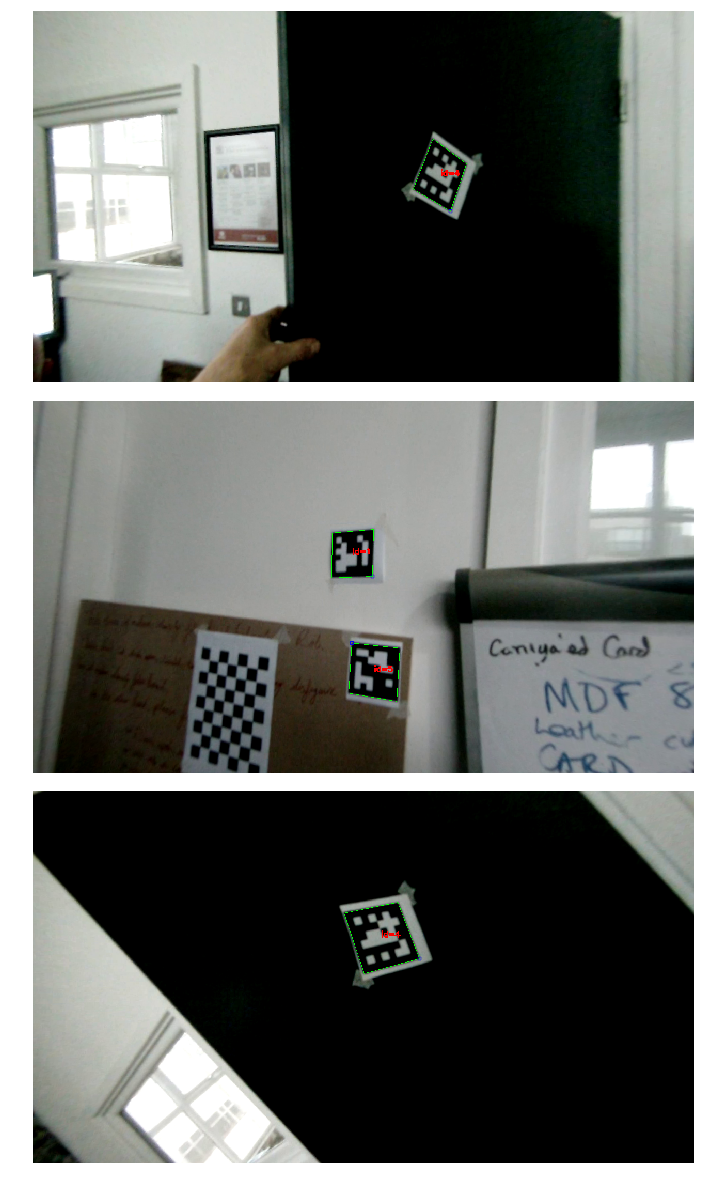

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,16))
iframes = [1, 5, 9]
for i in range(len(iframes)):
    frame = frames[iframes[i]]
    fframe = cv2.undistort(frame, mtx, dist, None, mtx)
    ax = plt.subplot(len(iframes), 1, i+1)
    
    gray = cv2.cvtColor(fframe, cv2.COLOR_BGR2GRAY)
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
    parameters =  cv2.aruco.DetectorParameters_create()
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    frame_markers = cv2.aruco.drawDetectedMarkers(cv2.cvtColor(fframe, cv2.COLOR_BGR2RGB), corners, ids)

    plt.imshow(frame_markers)
    print(ids)
    
    ax.axis("off")
plt.subplots_adjust(0,0,1,1,0.05,0.05)


In [35]:
cv2.aruco.drawDetectedMarkers?

Docstring:
drawDetectedMarkers(image, corners[, ids[, borderColor]]) -> image
.   * @brief Draw detected markers in image
.   *
.   * @param image input/output image. It must have 1 or 3 channels. The number of channels is not
.   * altered.
.   * @param corners positions of marker corners on input image.
.   * (e.g std::vector<std::vector<cv::Point2f> > ). For N detected markers, the dimensions of
.   * this array should be Nx4. The order of the corners should be clockwise.
.   * @param ids vector of identifiers for markers in markersCorners .
.   * Optional, if not provided, ids are not painted.
.   * @param borderColor color of marker borders. Rest of colors (text color and first corner color)
.   * are calculated based on this one to improve visualization.
.   *
.   * Given an array of detected marker corners and its corresponding ids, this functions draws
.   * the markers in the image. The marker borders are painted and the markers identifiers if provided.
.   * Useful for debugg

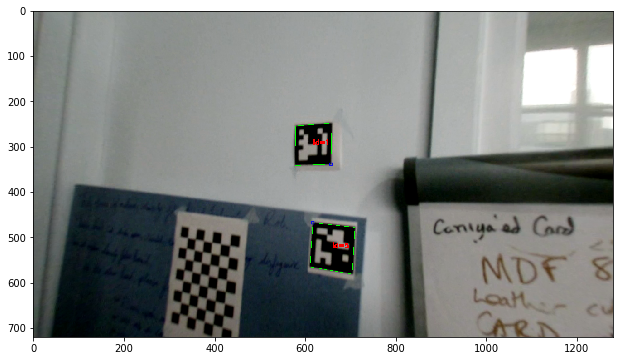

In [27]:
gray = cv2.cvtColor(fframe, cv2.COLOR_BGR2GRAY)
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = cv2.aruco.drawDetectedMarkers(fframe.copy(), corners, ids)
plt.figure(figsize=(15,6))
plt.imshow(frame_markers)

In [40]:
corners, ids

([array([[[748., 324.],
          [641., 353.],
          [602., 236.],
          [706., 215.]]], dtype=float32)], array([[4]], dtype=int32))